Shriyansh Singh

CECS 457 Section 01

**Project 2:** Patient Diagnosis Classification

Loading and Exploring the Data

In [2]:
import pandas as pd
import numpy as np

dataset = pd.read_csv('diabetes.csv')

In [2]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
# Finding any missing values
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Doing Data Preprocessing and Data Cleaning

In [5]:
from sklearn.preprocessing import StandardScaler

# Replacing zeros with NaN for certain features that can't have '0'
zero_not_accepted = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'Insulin']
for column in zero_not_accepted:
    dataset[column] = dataset[column].replace(0, np.NaN)

# Replacing NaN with the mean value of the column
dataset.fillna(dataset.mean(), inplace=True)

# Doing Feature Scaling to normalize the data
feature_scaler = StandardScaler()
features = dataset.drop('Outcome', axis=1)
target = dataset['Outcome']

scaled_features = feature_scaler.fit_transform(features)

Training and Testing Split

In [6]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.2, random_state=42)

Building and Training the SVM model

In [7]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Creating the model
model = SVC(kernel='rbf', random_state=42)

# Training the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

In [8]:
# Evaluating the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7532467532467533

Confusion Matrix:
 [[84 15]
 [23 32]]

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.85      0.82        99
           1       0.68      0.58      0.63        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.72       154
weighted avg       0.75      0.75      0.75       154



Improving the Model by Tuning the Hyperparameters

In [9]:
from sklearn.model_selection import GridSearchCV

# Defining the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear']
}

# Performing Grid Search to find the best parameters
tuned_model = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=5)

# Training the tuned model
tuned_model.fit(X_train, y_train)

# Printing out the best parameters
print("Best Parameters:", tuned_model.best_params_)

# Evaluating the tuned model with best parameters
tuned_model_predictions = tuned_model.predict(X_test)
print("\nAccuracy:", accuracy_score(y_test, tuned_model_predictions))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, tuned_model_predictions))
print("\nClassification Report:\n", classification_report(y_test, tuned_model_predictions))

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.

Visualizing the Results

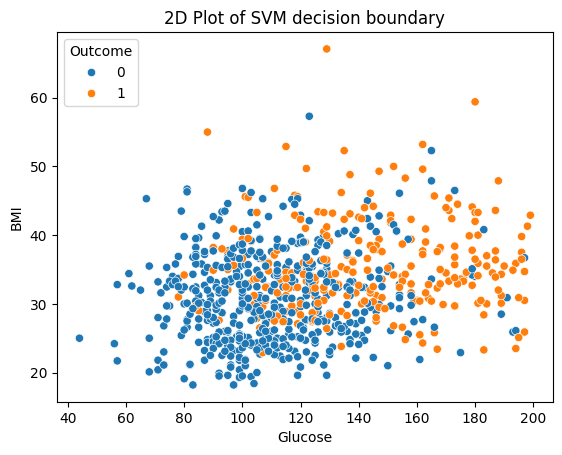

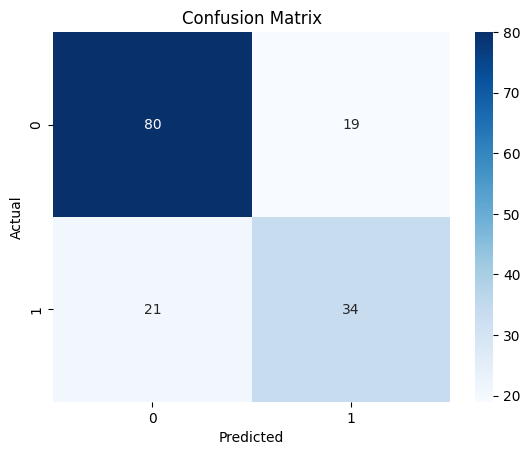

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# 2D Plot of SVM decision boundary
sns.scatterplot(x='Glucose', y='BMI', hue='Outcome', data=dataset)
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.title('2D Plot of SVM decision boundary')
plt.show()

# Plotting the confusion matrix as a heatmap
matrix = confusion_matrix(y_test, tuned_model_predictions)
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()